In [2]:
import pandas as pd

lambda_values = [0, 1, 1.5, 1.6, 1.7, 1.8, 1.9, 2, -1]

dfs = []

for lam in lambda_values:
    file_path = f"trained_models/lambda_{lam}/metrics.csv"
    
    try:
        df = pd.read_csv(file_path)
        df['lambda'] = lam
        dfs.append(df)
        print(f"Loaded {file_path}")
    except FileNotFoundError:
        print(f"File not found: {file_path}")

combined_df = pd.concat(dfs, ignore_index=True)
combined_df.columns

Loaded trained_models/lambda_0/metrics.csv
Loaded trained_models/lambda_1/metrics.csv
Loaded trained_models/lambda_1.5/metrics.csv
Loaded trained_models/lambda_1.6/metrics.csv
Loaded trained_models/lambda_1.7/metrics.csv
Loaded trained_models/lambda_1.8/metrics.csv
Loaded trained_models/lambda_1.9/metrics.csv
Loaded trained_models/lambda_2/metrics.csv
File not found: trained_models/lambda_-1/metrics.csv


Index(['epoch', 'train_loss', 'train_rec_loss', 'test_rec_loss', 'f1_amino',
       'f1_ss3', 'f1_ss8', 'f1_arom', 'r2_asa', 'r2_gravy', 'lambda'],
      dtype='object')

In [4]:
import pandas as pd

all_results_df = pd.read_csv("informed_feature_scores/all_results.csv")

merged_df = pd.merge(combined_df, all_results_df, on="lambda", how="outer")

merged_df[['lambda', 'test_rec_loss']]

,lambda,test_rec_loss
0,-1.0,NaN
1,0.0,0.014500
2,1.0,0.019717
3,1.5,0.017994
4,1.6,0.041198
5,1.7,0.043485
6,1.8,0.060357
7,1.9,0.119795
8,2.0,0.096961


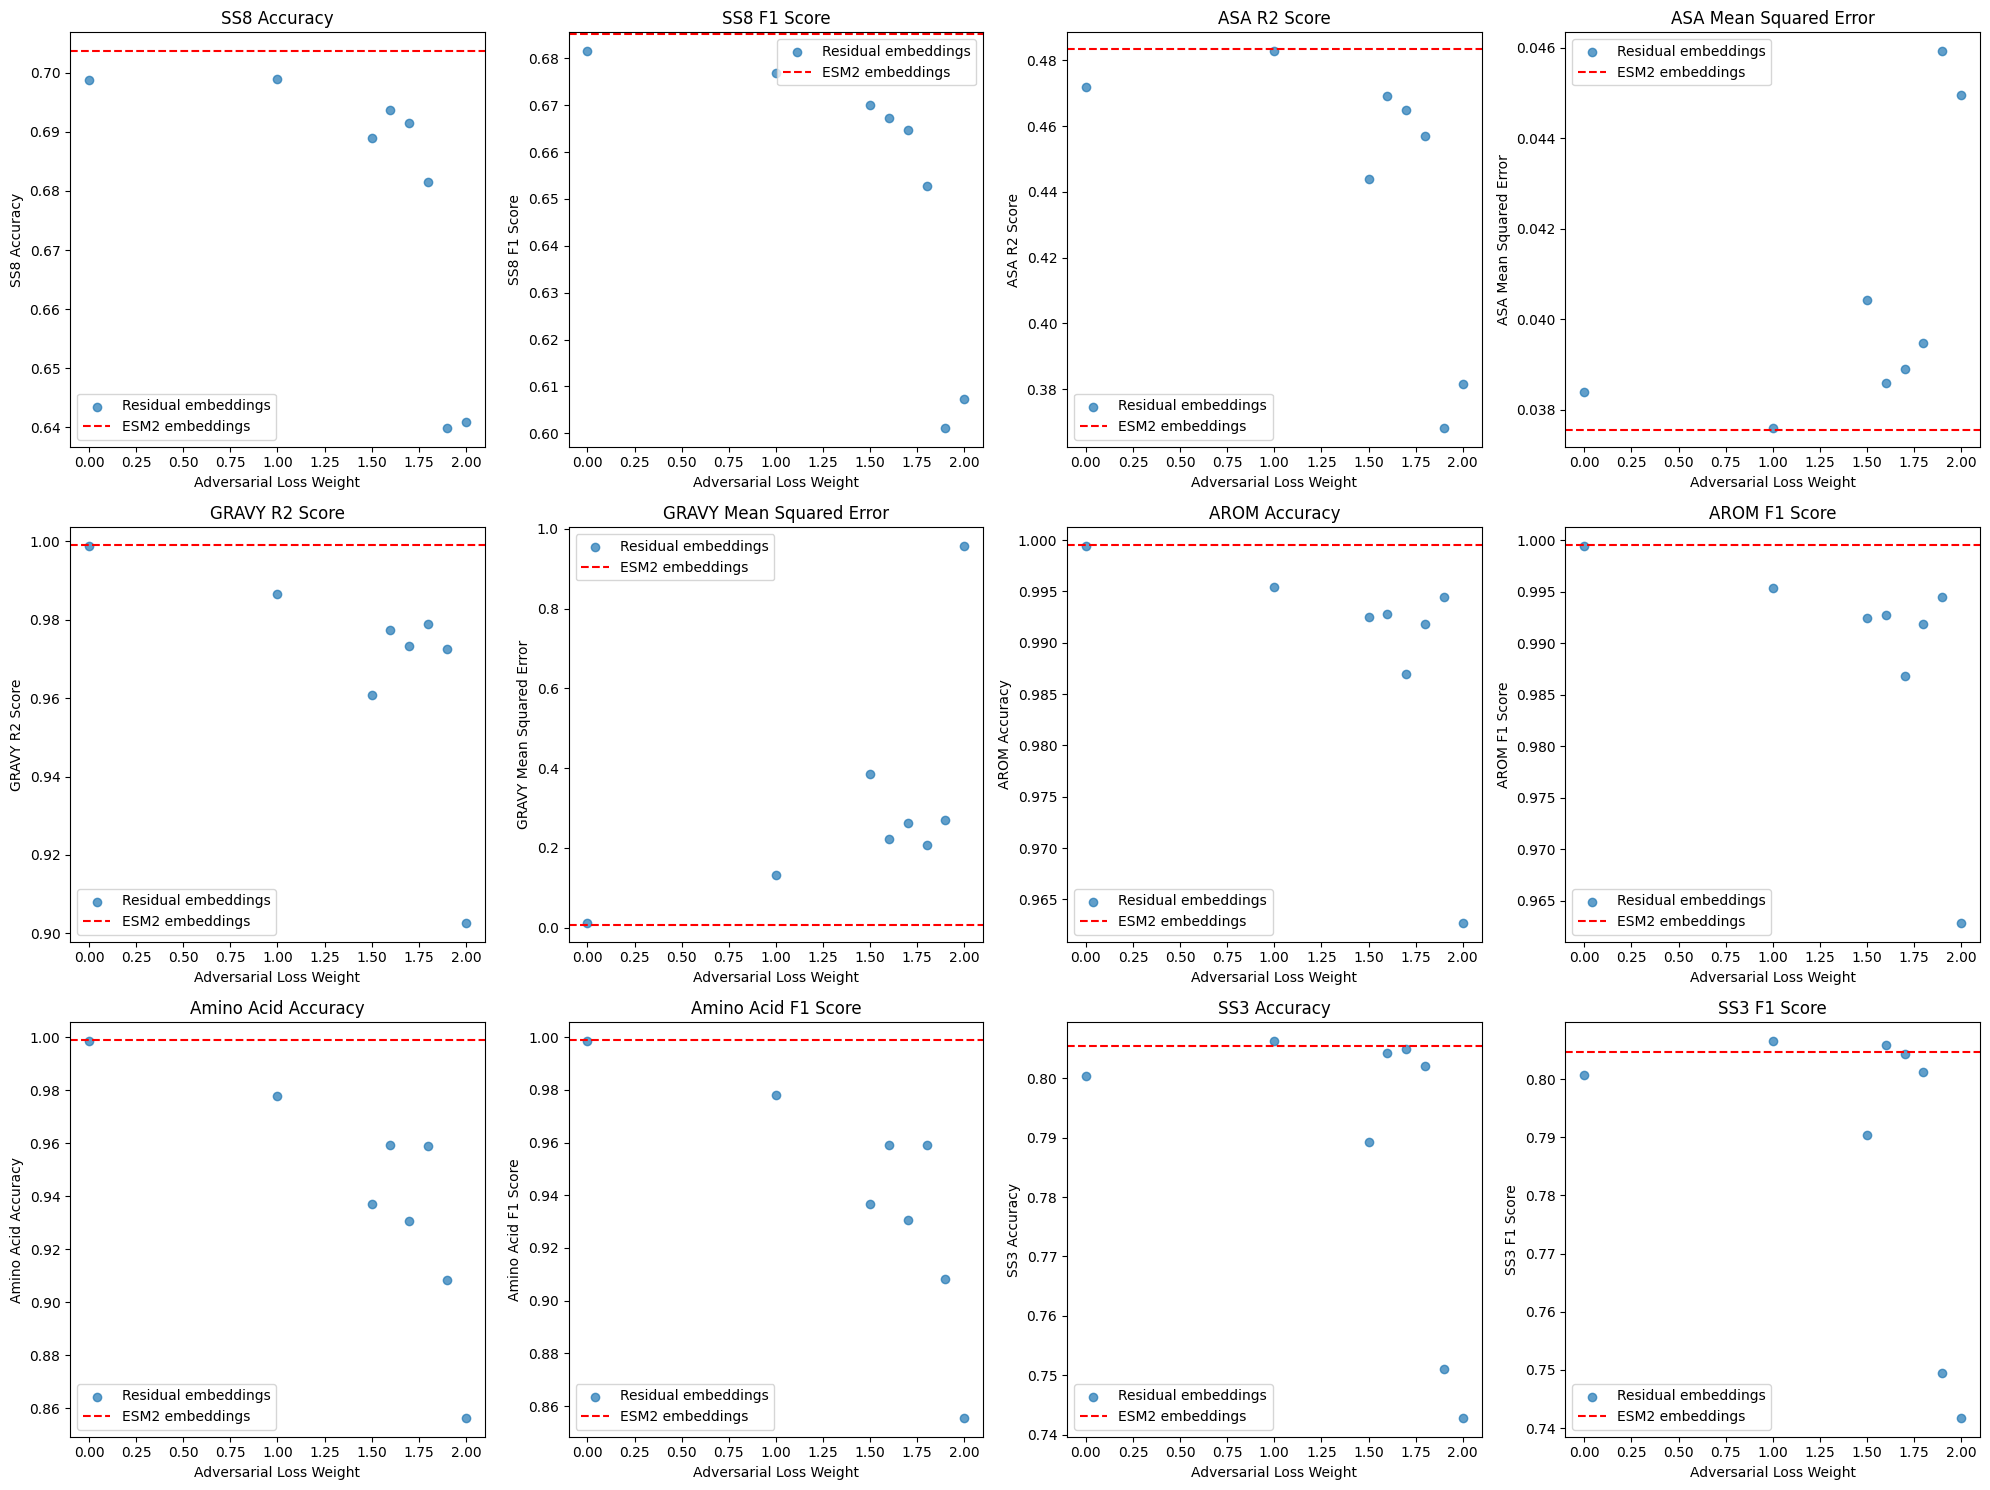

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# List of metric columns to plot against test reconstruction loss (lambda)
metrics = [
    'SS8_ACC', 'SS8_F1', 
    'ASA_R2', 'ASA_MSE', 
    'GRAVY_R2', 'GRAVY_MSE', 
    'AROM_ACC', 'AROM_F1', 
    'AminoAcid_ACC', 'AminoAcid_F1', 
    'SS3_ACC', 'SS3_F1'
]

# Mapping from metric column names to readable labels
label_mapping = {
    'SS8_ACC': 'SS8 Accuracy',
    'SS8_F1': 'SS8 F1 Score',
    'ASA_R2': 'ASA R2 Score',
    'ASA_MSE': 'ASA Mean Squared Error',
    'GRAVY_R2': 'GRAVY R2 Score',
    'GRAVY_MSE': 'GRAVY Mean Squared Error',
    'AROM_ACC': 'AROM Accuracy',
    'AROM_F1': 'AROM F1 Score',
    'AminoAcid_ACC': 'Amino Acid Accuracy',
    'AminoAcid_F1': 'Amino Acid F1 Score',
    'SS3_ACC': 'SS3 Accuracy',
    'SS3_F1': 'SS3 F1 Score'
}

# Separate baseline data (lambda == -1) from regular numeric data
baseline_df = merged_df[merged_df['lambda'] == -1]
regular_df = merged_df[merged_df['lambda'] != -1].copy()

# Convert the 'lambda' column in the regular data to float for proper numeric handling
regular_df['lambda'] = regular_df['lambda'].astype(float)

# Create subplots: 3 rows x 4 columns
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axs = axs.flatten()

for i, metric in enumerate(metrics):
    ax = axs[i]
    
    # Plot scatter and regression for regular (numeric) lambda values
    if not regular_df.empty:
        x_numeric = regular_df['lambda']
        y_numeric = regular_df[metric]
        
        # Scatter plot for the numeric lambda values
        ax.scatter(x_numeric, y_numeric, alpha=0.7, label="Residual embeddings")
        
        # Fit and plot a linear regression line (degree 1)
        coeffs = np.polyfit(x_numeric, y_numeric, 1)
        linear_fit = np.poly1d(coeffs)
        xs_fit = np.linspace(x_numeric.min(), x_numeric.max(), 100)
        ys_fit = linear_fit(xs_fit)
    
    # For baseline data (lambda = -1), draw a horizontal gray line
    if not baseline_df.empty:
        # Assuming a single baseline row is provided in the CSV
        baseline_value = baseline_df.iloc[0][metric]
        ax.axhline(y=baseline_value, color='red', linestyle='--', label="ESM2 embeddings")
    
    # Set axis labels and title using the friendly names
    friendly_label = label_mapping.get(metric, metric)
    ax.set_xlabel('Adversarial Loss Weight')
    ax.set_ylabel(friendly_label)
    ax.set_title(friendly_label)
    ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


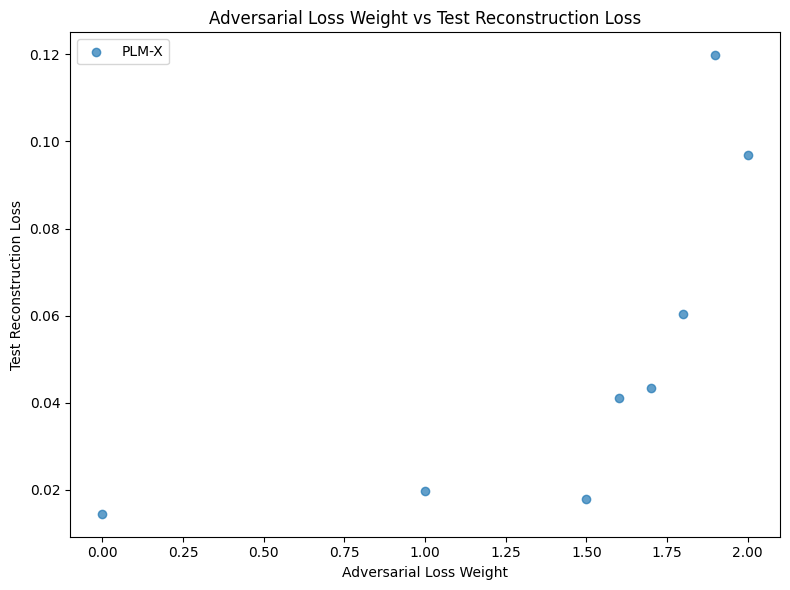

In [7]:
# Extract the x and y data
x_lambda = merged_df['lambda']
y_rec_loss = merged_df['test_rec_loss']

# Create a new figure
plt.figure(figsize=(8, 6))

# Plot the data points
plt.scatter(x_lambda, y_rec_loss, alpha=0.7, label='PLM-X')

# Fit a linear regression line (degree 1 polynomial)
coeffs = np.polyfit(x_lambda, y_rec_loss, 1)
linear_fit = np.poly1d(coeffs)

# Generate x-values for plotting the fitted line
xs_fit = np.linspace(x_lambda.min(), x_lambda.max(), 100)
ys_fit = linear_fit(xs_fit)

# Set labels and title
plt.xlabel("Adversarial Loss Weight")
plt.ylabel("Test Reconstruction Loss")
plt.title("Adversarial Loss Weight vs Test Reconstruction Loss")
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
merged_df['lambda']

0   -1.0
1    0.0
2    1.0
3    1.5
4    1.6
5    1.7
6    1.8
7    1.9
8    2.0
Name: lambda, dtype: float64